## Simple Examples
### Simple forward pass and shows the tokenization.

In [1]:
import os
import sys
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from utils.model_utils import tokenizer, run_model
text = "Hello world!"
inputs, outputs = run_model(text)
print("Tokens:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

Tokens: ['Hello', 'Ġworld', '!']


### Attention Heads Visualization

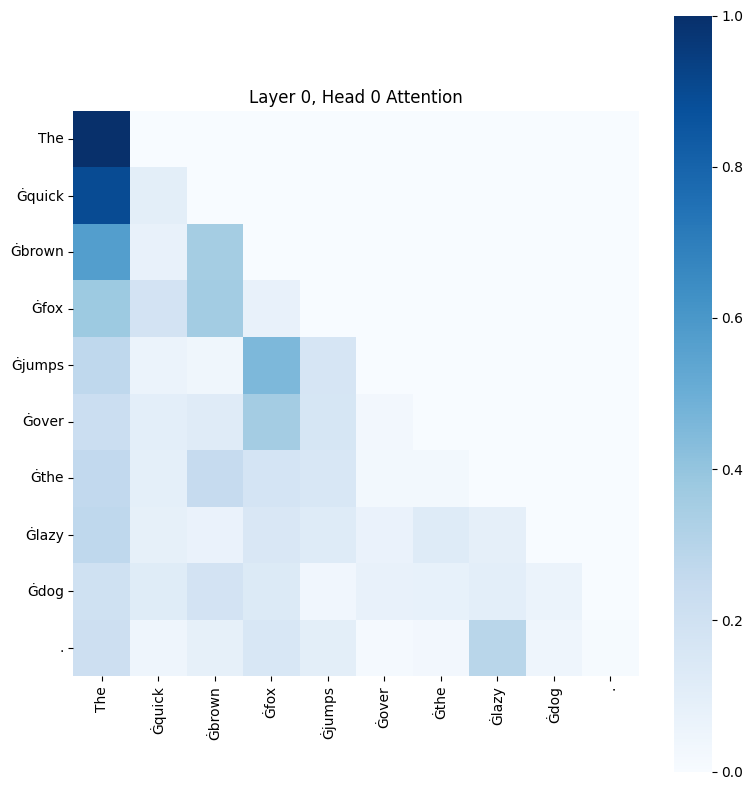

In [8]:
from utils.model_utils import tokenizer, run_model
from utils.viz_utils import plot_attention_heatmap

text = "The quick brown fox jumps over the lazy dog."
inputs, outputs = run_model(text)
attentions = outputs.attentions
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Plot attention for layer 0, head 0
plot_attention_heatmap(attentions[0][0], tokens, layer=0, head=0)

### Hidden States Analysis
We will plot how a single token's representation changes across layers using PCA.

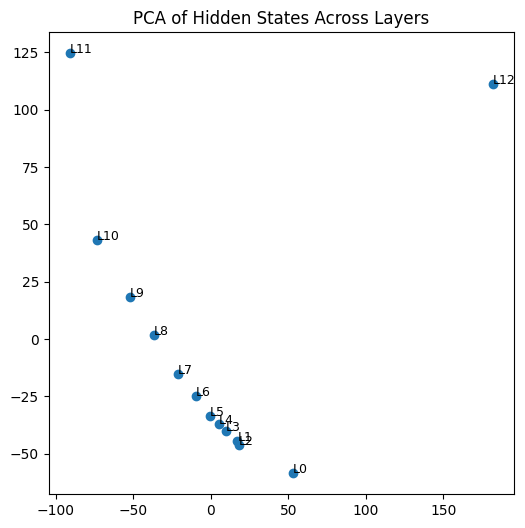

In [5]:
from utils.model_utils import run_model, tokenizer
from utils.viz_utils import plot_hidden_pca

text = "The quick brown fox jumps."
inputs, outputs = run_model(text)
hidden_states = outputs.hidden_states

# Let's pick the token at position 3 (e.g., "brown")
plot_hidden_pca(hidden_states, token_idx=3)

### Token Probability Ranking
For a next-token prediction model (like GPT-2), visualize top-k predicted tokens.

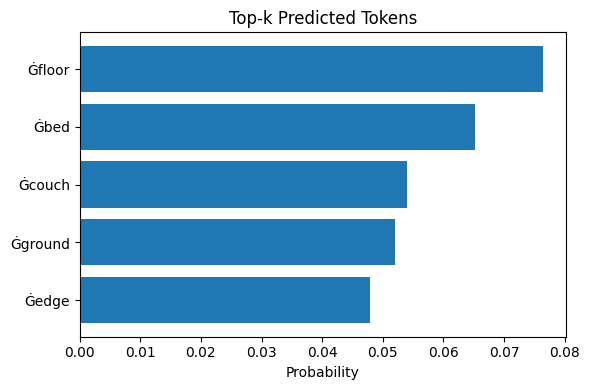

In [9]:
# Make sure your model_utils.py uses GPT-2 model.
from utils.model_utils import run_model, tokenizer
from utils.viz_utils import plot_token_probabilities

text = "The cat sat on the"
inputs, outputs = run_model(text)
plot_token_probabilities(outputs.logits, tokenizer)